In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/training_set'
valid_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/valid_set'
test_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/testing_set'

In [3]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)

Found 192 images belonging to 2 classes.
Found 192 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

In [6]:
vgg16_model = keras.applications.vgg16.VGG16()

In [7]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
type(vgg16_model)

keras.engine.functional.Functional

In [9]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)    

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
for layer in model.layers:
    layer.trainable = False

In [12]:
model.add(Dense(2, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
model.compile(Adam(learning_rate=.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(train_batches, steps_per_epoch=6, validation_data=valid_batches, validation_steps=6, epochs=30, verbose=2)

Epoch 1/30
6/6 - 151s - loss: 8.4133 - accuracy: 0.5573 - val_loss: 7.8320 - val_accuracy: 0.5000 - 151s/epoch - 25s/step
Epoch 2/30
6/6 - 139s - loss: 6.7682 - accuracy: 0.5469 - val_loss: 8.8479 - val_accuracy: 0.5000 - 139s/epoch - 23s/step
Epoch 3/30
6/6 - 142s - loss: 3.8856 - accuracy: 0.5990 - val_loss: 0.5359 - val_accuracy: 0.8281 - 142s/epoch - 24s/step
Epoch 4/30
6/6 - 121s - loss: 1.7792 - accuracy: 0.7292 - val_loss: 2.6230 - val_accuracy: 0.6354 - 121s/epoch - 20s/step
Epoch 5/30
6/6 - 139s - loss: 1.8830 - accuracy: 0.7188 - val_loss: 0.4347 - val_accuracy: 0.8750 - 139s/epoch - 23s/step
Epoch 6/30
6/6 - 137s - loss: 0.6732 - accuracy: 0.8438 - val_loss: 0.6437 - val_accuracy: 0.8385 - 137s/epoch - 23s/step
Epoch 7/30
6/6 - 129s - loss: 0.5638 - accuracy: 0.8698 - val_loss: 0.9324 - val_accuracy: 0.7969 - 129s/epoch - 22s/step
Epoch 8/30
6/6 - 129s - loss: 1.0426 - accuracy: 0.8073 - val_loss: 0.4204 - val_accuracy: 0.9115 - 129s/epoch - 22s/step
Epoch 9/30
6/6 - 131s - 

In [15]:
model.fit(train_batches, steps_per_epoch=6, validation_data=valid_batches, validation_steps=6, epochs=16, verbose=2)

Epoch 1/16
6/6 - 140s - loss: 15.4538 - accuracy: 0.4271 - val_loss: 7.9772 - val_accuracy: 0.5000 - 140s/epoch - 23s/step
Epoch 2/16
6/6 - 145s - loss: 6.7775 - accuracy: 0.5208 - val_loss: 1.4834 - val_accuracy: 0.6198 - 145s/epoch - 24s/step
Epoch 3/16
6/6 - 139s - loss: 3.2277 - accuracy: 0.5781 - val_loss: 3.9093 - val_accuracy: 0.5469 - 139s/epoch - 23s/step
Epoch 4/16
6/6 - 140s - loss: 2.0901 - accuracy: 0.6719 - val_loss: 0.4727 - val_accuracy: 0.8490 - 140s/epoch - 23s/step
Epoch 5/16
6/6 - 134s - loss: 1.0909 - accuracy: 0.7865 - val_loss: 1.0509 - val_accuracy: 0.7448 - 134s/epoch - 22s/step
Epoch 6/16
6/6 - 134s - loss: 0.8296 - accuracy: 0.8177 - val_loss: 0.4977 - val_accuracy: 0.8906 - 134s/epoch - 22s/step
Epoch 7/16
6/6 - 130s - loss: 0.5909 - accuracy: 0.8229 - val_loss: 0.7418 - val_accuracy: 0.8281 - 130s/epoch - 22s/step
Epoch 8/16
6/6 - 134s - loss: 0.9890 - accuracy: 0.7812 - val_loss: 0.9677 - val_accuracy: 0.7708 - 134s/epoch - 22s/step
Epoch 9/16
6/6 - 130s -

In [16]:
test_imgs, test_labels = next(test_batches)


In [17]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
      dtype=float32)

In [18]:
predictions = model.predict(test_batches, steps = 1, verbose = 0)
predictions

array([[9.88124907e-01, 1.18751004e-02],
       [9.96280074e-01, 3.71995009e-03],
       [2.42196545e-01, 7.57803380e-01],
       [7.68177733e-02, 9.23182189e-01],
       [7.99382865e-01, 2.00617075e-01],
       [1.20138975e-05, 9.99987900e-01],
       [9.99993980e-01, 5.97848702e-06],
       [2.10137409e-03, 9.97898579e-01],
       [6.24087825e-03, 9.93759155e-01],
       [9.98961926e-01, 1.03796273e-03],
       [3.74273300e-01, 6.25726759e-01],
       [4.22099693e-04, 9.99577940e-01],
       [2.86920951e-03, 9.97130752e-01],
       [8.26516867e-01, 1.73483178e-01],
       [8.62708151e-01, 1.37291744e-01],
       [3.93850632e-06, 9.99996006e-01],
       [9.96280074e-01, 3.71995009e-03],
       [1.81946659e-03, 9.98180449e-01],
       [9.64267135e-01, 3.57328020e-02],
       [9.28720832e-01, 7.12792575e-02],
       [4.11683650e-05, 9.99958813e-01],
       [5.54136466e-04, 9.99445796e-01],
       [9.99999940e-01, 1.68706504e-09],
       [3.71612714e-06, 9.99996245e-01],
       [1.528035

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[14  0]
 [ 2 16]]


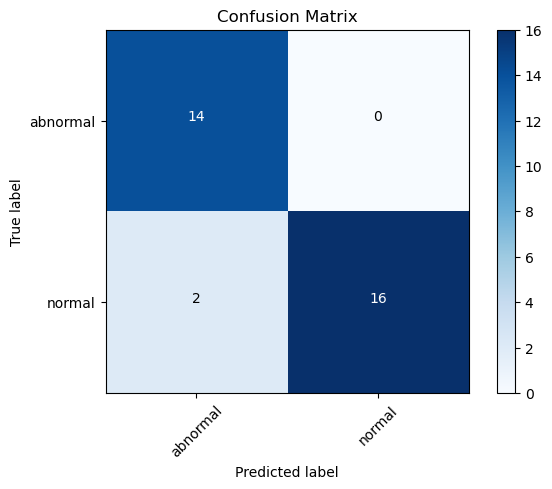

In [21]:
cm_plot_labels = ['abnormal', 'normal']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')